## Create spectral templates 

Here we an ND array of spectral templates pre-generated with Xspec.

In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'


import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import numpy as np
from ipywidgets.widgets.interaction import interact
from pandas import read_csv
from astropy.io import fits

def define_ax():
    fig, ax = plt.subplots(1, 1, figsize=(10,6))
                 
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(0.45,9.1)
    ax.set_ylim(3e-3,1e3)                  
    ax.set_xlabel('Energy (keV)',fontsize=15)
    ax.set_ylabel('Counts / s / keV',fontsize=15)
    
    return fig, ax

## Thermal model

Plotting the thermal model for different Nh (absorption), temperature, and ionization timescale.
Saving all the templates in an ND array.

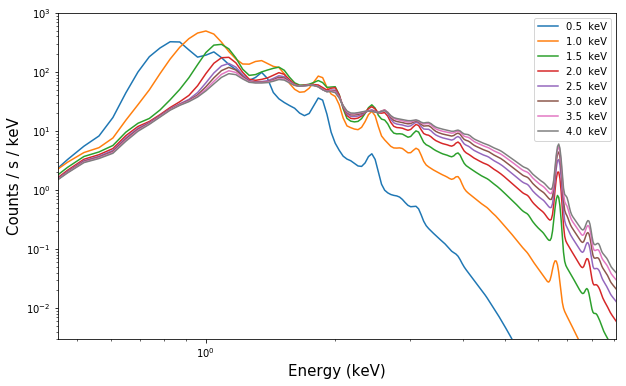

In [6]:
instrument='Chandra-ACIS'
abund='SOLAR'

#nh_list=[0.5, 1.0, 1.5, 2.0]
nh_list=[0.5]
kT_list=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
#logtau_list=[8, 9, 10, 11, 12, 13]
logtau_list=[12]
#template=np.zeros( (341, len(kT_list), len(logtau_list))  )
template=np.zeros( (341, len(kT_list))  )

fig, ax = define_ax()

for i,nh in enumerate(nh_list):

    for j,kT in enumerate(kT_list):

        for k,logtau in enumerate(logtau_list):
  
            my_file = 'data/%s/xspec_nei_%s_nh%s_kT%s_tau1e%s.dat.gz'%(instrument, abund, nh, kT, logtau)
        
            data=read_csv(my_file,skiprows=3,delimiter=' ', names=['E','model']) 
            E, model = data['E'], data['model']
            ax.plot(E, model,label='%s  keV'%(kT))
#            template[:,j,k]=model
            template[:,j]=model

plt.legend()

In [9]:
fits.writeto('thermal_kT0.5-4keV_template.fits',template.T,overwrite=True)
#fits.writeto('thermal_kT0.5-4keV_LogTau8-13_template.fits',template.T,overwrite=True)

## Perseus apec model

(0.01, 10000.0)

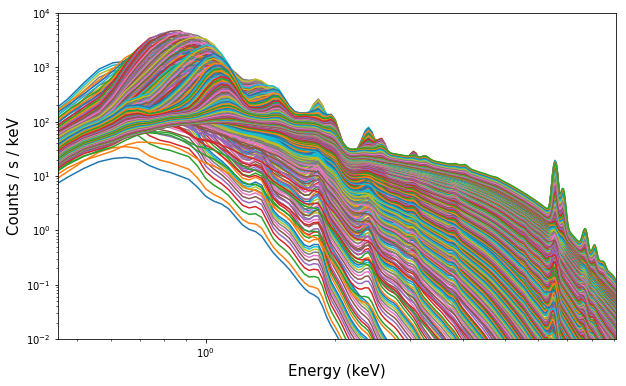

In [35]:
instrument='Chandra-ACIS'
abund='SOLAR'

#nh_list=[0.5, 1.0, 1.5, 2.0]
nh_list=[0.16]
kT_list=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3, 3.5, 4, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0]
abund_list=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4, 4.5, 5]

#kT_list=[0.4, 0.6, 0.8, 1.0 ]
#abund_list=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
#abund_list=[0.5]


template=np.zeros( (341, len(kT_list),len(abund_list) )  )

fig, ax = define_ax()

for i,nh in enumerate(nh_list):

    for j,kT in enumerate(kT_list):

        for k,abund in enumerate(abund_list):
  
            my_file = 'data/%s/xspec_apec_nh%s_kT%s_abund%s.dat.gz'%(instrument, nh, kT, abund)
        
            data=read_csv(my_file,skiprows=3,delimiter=' ', names=['E','model']) 
            E, model = data['E'], data['model']
            ax.plot(E, model,label='%s keV, abund=%s'%(kT,abund))
            template[:,j,k]=model
#            template[:,j]=model
ax.set_ylim(1e-2,1e4)
#plt.legend(loc='upper right')

In [61]:
fits.writeto('thermal_kT0.2-7keV_abund0.05-5_template_483samples.fits',template.T,overwrite=True)


In [62]:
hdu1=fits.PrimaryHDU(template.T)

hdu2 = fits.BinTableHDU.from_columns([fits.Column(name='kT', format='D', array=kT_list)])
hdu3 = fits.BinTableHDU.from_columns([fits.Column(name='Abundance', format='D', array=abund_list)])
hdu2.name='kT'
hdu3.name='Abundance'

hdus = fits.HDUList([hdu1, hdu2,hdu3])
hdus.writeto('thermal_kT0.2-7keV_abund0.05-5_template_483samples.fits',overwrite=True)

## Power-Law model

Plotting the power-law model for different Nh. 
Saving all the templates in an ND array.


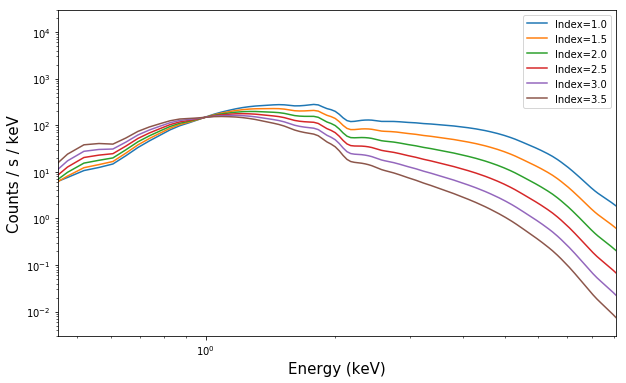

In [49]:
instrument='Chandra-ACIS'

#nh_list=[0.5, 1.0, 1.5, 2.0]
nh_list=[0.5]
index_list=[1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
template=np.zeros( (341, len(index_list))  )


fig, ax = define_ax()

for i,nh in enumerate(nh_list):

    for j,index in enumerate(index_list):

        my_file = 'data/%s/xspec_pow_nh%s_Index%s.dat.gz'%(instrument, nh, index)

        data=read_csv(my_file,skiprows=3,delimiter=' ', names=['E','model']) 
        E, model = data['E'], data['model']
        ax.plot(E, model,label='Index=%s'%(index))
        template[:,j]=model
plt.legend()

In [50]:
fits.writeto('PowerLaw_Index1.0-3.5_template.fits',template.T,overwrite=True)